In [90]:
from time import strptime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier



In [49]:
# Supplementary functions for data parsing and tidying

# Month to int function

def month_str_to_int(month): # convert a month's name to a float number
    try:
        month_num = strptime(month, '%B').tm_mon
    except:
        return None
    return month_num

def week_str_to_int(week): # convert a month's name to a float number
    try:
        week_num = week.strip("week_")
    except:
        return None
    return week_num


def convert_column_to_num_month(df, column_name): #apply month_str_to_int to a whole column
    df = df[column_name]
    df = df.apply(month_str_to_int)
    df = df.apply(lambda x: "{:.0f}".
                  format(x) if not pd.isnull(x) else x) # format as int
    df = df.apply(lambda x: int(x) if not pd.isnull(x) else x)
    return df

def strip_week_column(df, column_name):
    df = df.apply(week_str_to_int)
    df = df.apply(lambda x: "{:.0f}".
                  format(x) if not pd.isnull(x) else x) # format as int
    df = df.apply(lambda x: int(x) if not pd.isnull(x) else x)
    return df
    



def csv_load(file): # suuplementry to load a CSV file and return as df, in the future to be extended
    df = pd.read_csv(file)
    return df

#Correlation creator
## This function shall be used for numeric features only

def plot_correlations(feature1, feature2):
    plt.plot(df[feature1], df[feature2])
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(("The correlation between {} and {}".format(feature1, feature2)))
    plt.show()
    return


def plot_scatter(feature1, feature2):
    plt.scatter(df[feature1], df[feature2])
    plt.grid()
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(("The correlation between {} and {}".format(feature1, feature2)))
    plt.show()
    return


In [50]:
# Main build

df = csv_load("Data/feature_data.csv") #Reading the CSV data file
features = df.columns
print(features)


# Data manipulations

df["order_month"] = convert_column_to_num_month(df, "order_month")
df['order_week'] = df['order_week'].str.strip("week_")
df['order_week'] = df['order_week'].astype(int)


Index(['Unnamed: 0', 'time_until_order', 'order_year', 'order_month',
       'order_week', 'order_day_of_month', 'adults', 'children', 'babies',
       'country', 'order_type', 'acquisition_channel', 'prev_canceled',
       'prev_not_canceled', 'changes', 'deposit_type', 'agent', 'company',
       'customer_type', 'adr', 'anon_feat_0', 'anon_feat_1', 'anon_feat_2',
       'anon_feat_3', 'anon_feat_4', 'anon_feat_5', 'anon_feat_6',
       'anon_feat_7', 'anon_feat_8', 'anon_feat_9', 'anon_feat_10',
       'anon_feat_11', 'anon_feat_12', 'anon_feat_13'],
      dtype='object')


# Part 1: Exploration, Basic Hypothesis

# plot_correlations("changes", "prev_canceled")

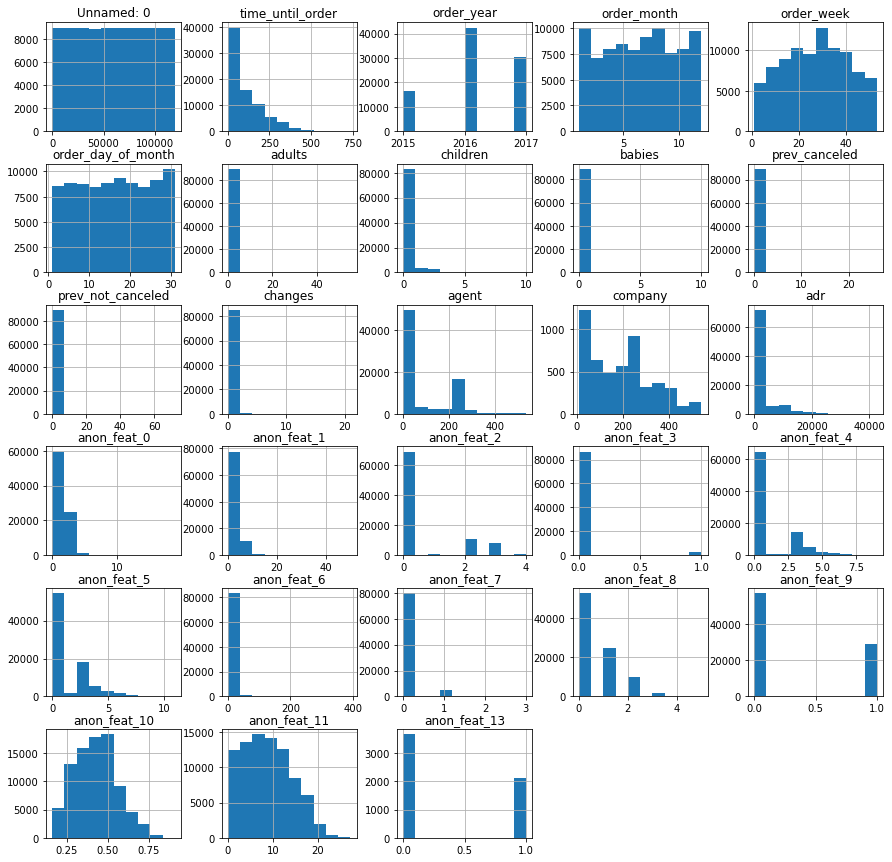

In [51]:
df.hist(figsize=(15,15))
plt.show()

In [52]:
df.corr().style.background_gradient(cmap= 'coolwarm')
#strong postive correlation between
# order week - order month
# anon feature 11 - time until order
# agent - anon feat 9 
#anon feature 5 - anon feature 4


,Unnamed: 0,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,prev_canceled,prev_not_canceled,changes,agent,company,adr,anon_feat_0,anon_feat_1,anon_feat_2,anon_feat_3,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
Unnamed: 0,1.000000,0.008234,0.299310,-0.049357,-0.053666,0.010057,-0.005796,-0.023063,-0.028345,-0.018364,-0.000844,-0.004441,-0.615504,-0.208787,0.020074,-0.149813,-0.205640,0.041075,-0.019378,-0.157052,-0.195246,-0.013731,-0.133586,0.106112,-0.818237,-0.011636,0.004953,-0.001602,-0.255275
time_until_order,0.008234,1.000000,0.039087,0.130043,0.126044,0.003031,0.123699,-0.039179,-0.021315,0.084876,-0.074639,0.000295,-0.071875,0.156485,0.012048,0.087673,0.165793,-0.002684,-0.125870,-0.104356,-0.170992,0.172199,-0.115189,-0.094990,-0.078964,-0.487098,0.959980,-0.005159,0.291412
order_year,0.299310,0.039087,1.000000,-0.527250,-0.540346,0.001116,0.034312,0.051760,-0.012514,-0.119836,0.029331,0.030669,0.062462,0.255305,0.024363,0.019992,0.029429,0.065655,0.009743,0.092226,0.035632,-0.056072,-0.014540,0.108936,-0.034409,-0.039040,0.050678,-0.002689,0.014805
order_month,-0.049357,0.130043,-0.527250,1.000000,0.995111,-0.024250,0.028011,0.005158,0.007802,0.037293,-0.021953,0.005057,-0.029225,-0.080687,0.063480,0.021733,0.021080,-0.014134,-0.030423,-0.007205,-0.005355,0.017983,0.001929,0.028721,-0.002816,-0.062484,0.125519,-0.000386,0.002810
order_week,-0.053666,0.126044,-0.540346,0.995111,1.000000,0.067816,0.025749,0.005611,0.008575,0.035227,-0.021109,0.006180,-0.031028,-0.077242,0.067232,0.020374,0.016334,-0.015879,-0.029861,-0.006920,-0.004884,0.022197,0.002962,0.026861,-0.002033,-0.061043,0.121496,-0.000810,0.002486
order_day_of_month,0.010057,0.003031,0.001116,-0.024250,0.067816,1.000000,-0.001731,0.015827,0.001337,-0.024917,0.001862,0.010334,-0.000040,0.050604,0.043146,-0.015037,-0.028578,-0.005779,-0.006582,0.015121,0.009192,0.021225,0.006901,0.003584,0.000472,-0.010269,0.007953,-0.001133,0.008743
adults,-0.005796,0.123699,0.034312,0.028011,0.025749,-0.001731,1.000000,0.032568,0.020909,-0.007315,-0.111358,-0.049944,-0.035456,0.199110,0.125008,0.095898,0.091632,0.024537,-0.151878,0.216493,0.147987,-0.009634,0.019174,0.130470,0.010017,-0.124635,0.151967,0.003792,0.053173
children,-0.023063,-0.039179,0.051760,0.005158,0.005611,0.015827,0.032568,1.000000,0.025264,-0.024775,-0.021466,0.050719,0.042756,0.030002,0.154710,0.047129,0.044691,-0.050536,-0.033760,0.377861,0.329290,-0.033714,0.056907,0.080463,0.046501,-0.002811,-0.028192,-0.001040,0.030702
babies,-0.028345,-0.021315,-0.012514,0.007802,0.008575,0.001337,0.020909,0.025264,1.000000,-0.007703,-0.007084,0.081313,0.037577,0.009572,0.016577,0.017176,0.019489,0.003212,-0.009158,0.041805,0.043314,-0.010851,0.034375,0.099443,0.043540,0.009081,-0.020595,0.007887,-0.030580
prev_canceled,-0.018364,0.084876,-0.119836,0.037293,0.035227,-0.024917,-0.007315,-0.024775,-0.007703,1.000000,0.147278,-0.027251,-0.012652,-0.187248,-0.031825,-0.015218,-0.015059,-0.003083,0.081758,-0.049984,-0.059345,0.006438,-0.018536,-0.048199,0.013700,-0.033175,0.076986,0.007404,0.108098


In [55]:
df['is_summer_vac'] = (5<=df['order_month']) & (df['order_month'] <=9)
df['has_kids'] = df['children'] > 0 
df['ordered_in_advance'] = df['time_until_order'] > 250

y= pd.read_csv('Example/label_data.csv')
y["cancelation"] = y["cancelation"].astype(int)
df.corrwith(y["cancelation"])

Unnamed: 0           -0.242871
time_until_order      0.294502
order_year            0.014949
order_month           0.012261
order_week            0.009628
order_day_of_month   -0.006737
adults                0.058103
children              0.005691
babies               -0.032331
prev_canceled         0.109633
prev_not_canceled    -0.060068
changes              -0.144559
agent                -0.081911
company              -0.012482
adr                  -0.070436
anon_feat_0          -0.000038
anon_feat_1           0.026997
anon_feat_2          -0.016972
anon_feat_3          -0.085612
anon_feat_4          -0.060772
anon_feat_5          -0.176803
anon_feat_6           0.058219
anon_feat_7          -0.197533
anon_feat_8          -0.233985
anon_feat_9          -0.136527
anon_feat_10         -0.204077
anon_feat_11          0.313919
anon_feat_12         -0.004417
anon_feat_13          1.000000
is_summer_vac         0.036573
has_kids             -0.004485
ordered_in_advance    0.188804
dtype: f

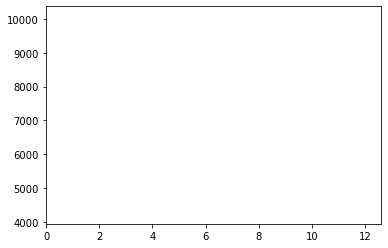

In [54]:
#too basic

#1 number of orders per month. Conclusion: August is the most...

# plot_scatter("order_year", "time_until_order")
orders_per_month = dict(Counter(df['order_month']))
months = sorted(list(orders_per_month.keys()))
orders_num = [orders_per_month[val] for val in months]
plt.barh(orders_num, months)
plt.show()

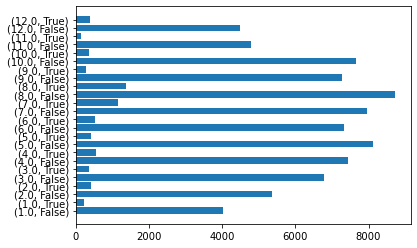

<Figure size 30000x30000 with 0 Axes>

In [67]:
## too cluster

#2 number of children affecting month of order
df2 = df.groupby(['order_month', 'has_kids']).count()
# temo = list(df2.index)
mont = ["".join(str(i)) for i in list(df2.index)]
x = plt.barh(mont, df2['Unnamed: 0'])
plt.figure(figsize=(200, 200), dpi=150)
plt.show()


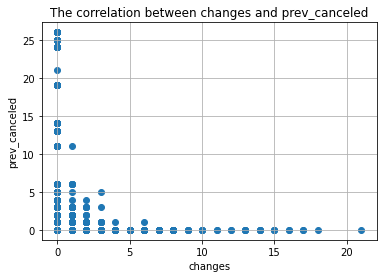

In [156]:
#3
plot_scatter("changes", "prev_canceled")

# Answers

<br>
1. People who have deleted their orders more than 20 times.
  family with 10 kids that ordered a hotel
  -those cases are possible but they are outliers, therefore, we moved only the features that have more than 50% missing values
<br>
2. The data is not scaled.  scaling is essential for machine learning algorithms that calculate distances between data. If not scale, the feature with a higher value range starts dominating when calculating distances.
<br>
3. There are 253577 missing values in the dataframe. we chose to move only the features that with more than 50% missing values
<brhave
4. The problem has more than 30  features for each row. big dimensionality can affect the predictions' accuracy.

drop features nan
standart for numeric discrete values
to put back on same df

In [68]:
drop_col = df.isnull().sum().divide(89541)
drop_col = list(drop_col[drop_col>0.5].index)
drop_col

['company', 'anon_feat_13']

In [69]:
df.notnull().sum().sum()

3059477

In [70]:
# Using Standard Scaler


# We chose features for standardization by dropping non-numeric or cyclic values

features_to_scale = ['time_until_order', 'adults', 'children', 'babies',
       'prev_canceled',
       'prev_not_canceled', 'changes',
      'adr', 'anon_feat_0', 'anon_feat_1', 'anon_feat_2',
       'anon_feat_3', 'anon_feat_4', 'anon_feat_5', 'anon_feat_6',
       'anon_feat_7', 'anon_feat_8', 'anon_feat_9', 'anon_feat_10',
       'anon_feat_11']

x = df.loc[:,features_to_scale].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)


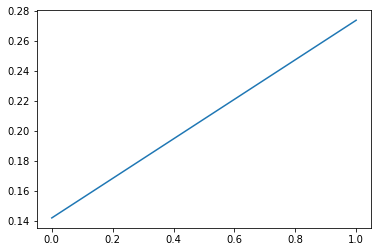

In [81]:
from sklearn.decomposition import PCA

x = x.dropna()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [82]:
df['order_type'].unique()

array(['Offline TA/TO', 'Online TA', 'Direct', 'Corporate', 'Groups',
       'Aviation', 'Complementary', 'Undefined'], dtype=object)

In [83]:
#A block to test correlations of PCA values on different feature values and show them (different colors)
#
# fig = plt.figure(figsize = (10,10))
# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = list(df['order_type'].unique())
# colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'green']
# for target, color in zip(targets,colors):
#     indicesToKeep = df['order_type'] == target
#     ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
#                , principalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

In [84]:
# Now after scaling, we would like to edit the main df and drop nan values altogether:
df = df.drop(columns=drop_col)
df = df.drop(columns=features_to_scale)

In [85]:
df[list(principalDf.columns)] = principalDf
df

,Unnamed: 0,order_year,order_month,order_week,order_day_of_month,country,order_type,acquisition_channel,deposit_type,agent,customer_type,anon_feat_12,is_summer_vac,has_kids,ordered_in_advance,principal component 1,principal component 2
0,51014,2016,5.0,20,13,PRT,Offline TA/TO,TA/TO,No Deposit,3.0,Transient-Party,True,True,False,True,5.063898,-0.048123
1,28536,2016,10.0,41,2,ESP,Online TA,TA/TO,NaN,240.0,Transient,True,False,False,False,-2.248258,0.255378
2,21745,2017,3.0,12,19,DEU,Direct,Direct,No Deposit,NaN,Transient-Party,True,False,False,False,0.367595,4.375070
3,17502,2015,9.0,40,29,GBR,Offline TA/TO,TA/TO,No Deposit,40.0,Contract,True,True,False,False,0.006988,-1.245974
4,83295,2016,1.0,5,25,BRA,Corporate,Corporate,No Deposit,38.0,NaN,True,False,False,False,-1.891674,3.163646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89537,112553,2017,5.0,21,21,CHE,Online TA,TA/TO,No Deposit,8.0,NaN,True,True,False,False,NaN,NaN
89538,87372,2016,4.0,16,14,DEU,Online TA,TA/TO,No Deposit,9.0,Transient,False,False,False,False,NaN,NaN
89539,16490,2015,8.0,35,23,PRT,Online TA,TA/TO,No Deposit,240.0,Transient,False,True,False,False,NaN,NaN
89540,1185,2015,NaN,34,17,PRT,Online TA,TA/TO,No Deposit,240.0,Transient,True,False,False,False,NaN,NaN


# Modelling

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [52389, 89542]

In [94]:
clfs = [KNeighborsClassifier(), LogisticRegression(), MLPClassifier(), RamdomForest()]

NameError: name 'RamdomForest' is not defined

In [95]:
for clf in clfs:
    clf.fit(X_train, y_train)
    plot_roc_curve(clf, X_train, y_train)
    plt.show()
    

NameError: name 'clfs' is not defined